In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from umap import UMAP
from sklearn.decomposition import PCA

sns.set(font_scale=1.3)

In [2]:
y = pd.read_csv('emotions_short.csv')['Emotion']
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

In [3]:
def visualize(data, title, s=2, apply_pca=False, n_components=None):
    if apply_pca:
        pca = PCA(n_components=n_components, random_state=42).fit(data)
        data = pca.transform(data)
        
    umap_emb = UMAP(random_state=42).fit_transform(data)

    cdict = {0: 'orange', 1: 'black', 2: 'green', 3: 'blueviolet', 4: 'red', 5: 'blue'}
    
    plt.figure(figsize=(16, 12))
    plt.title('UMAP for {} embeddings'.format(title))
    for g in np.unique(y):
        ix = np.where(y == g)
        plt.scatter(umap_emb[ix, 0], umap_emb[ix, 1], c = cdict[g], label = label_encoder.inverse_transform([g])[0], s=s)
#     plt.xlabel('First Projection')
#     plt.ylabel('Second Projection')
    legend = plt.legend()
    for i in range(6):
        legend.legendHandles[i]._sizes = [45]
    plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    plt.show()

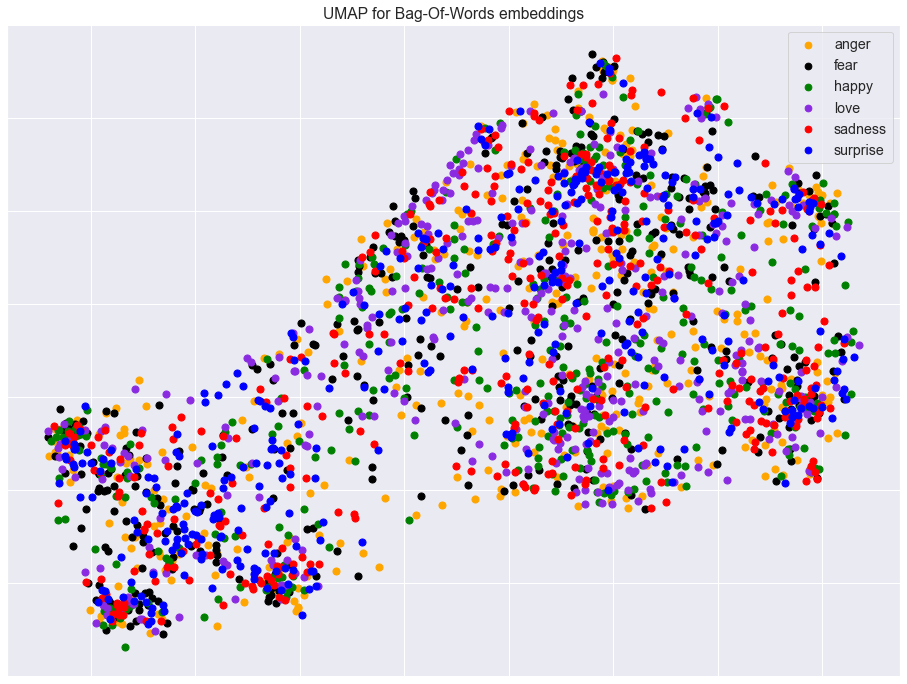

In [4]:
embeddings = pd.read_csv('./embeddings/bag_of_words_embeddings.csv')
visualize(embeddings, 'Bag-Of-Words', 50, True, 1400)

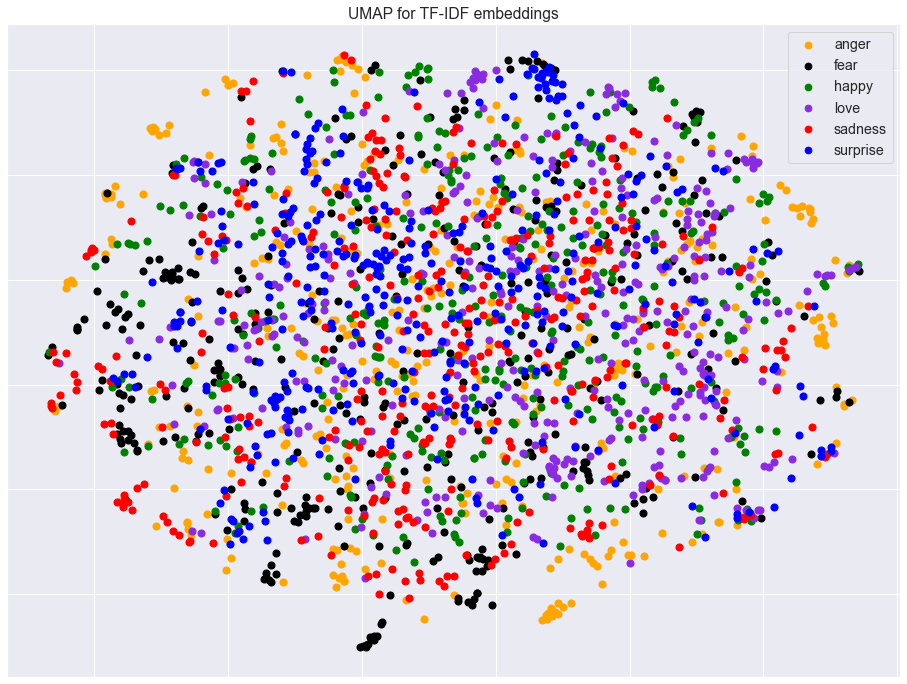

In [5]:
embeddings = pd.read_csv('./embeddings/tf_idf_embeddings.csv')
visualize(embeddings, 'TF-IDF', 50, True, 800)

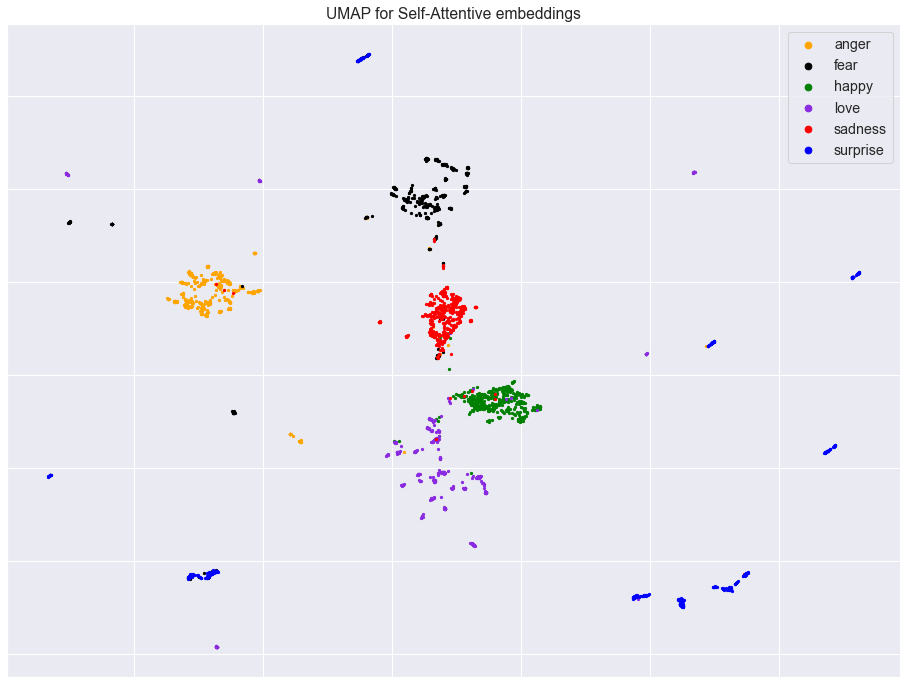

In [6]:
embeddings = pd.read_csv('./embeddings/self_attentive_embeddings.csv')
visualize(embeddings, 'Self-Attentive', s=5)

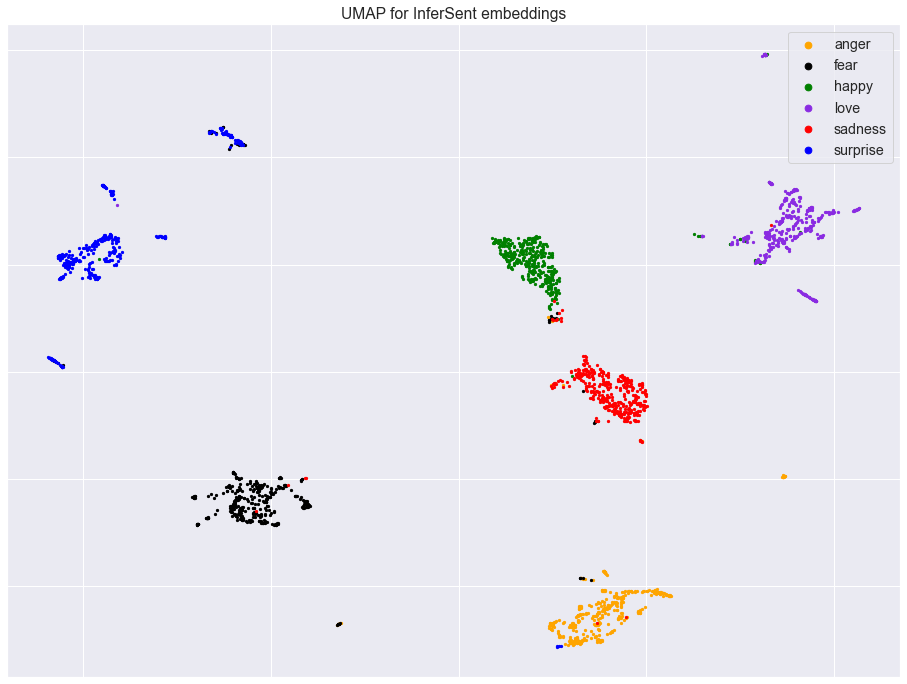

In [7]:
embeddings = pd.read_csv('./embeddings/infersent_embeddings.csv')
visualize(embeddings, 'InferSent', s=5)

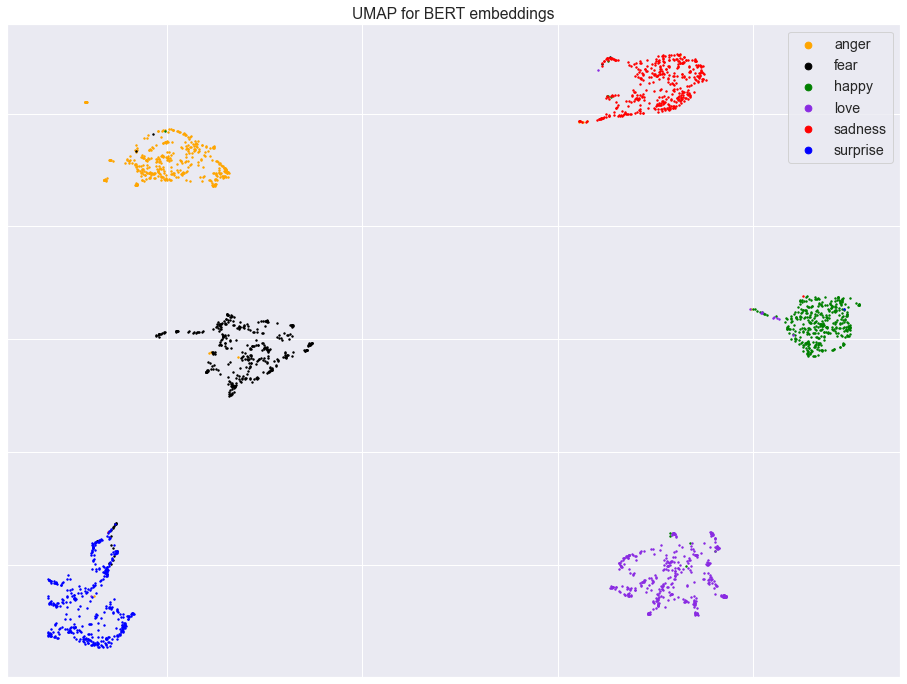

In [8]:
embeddings = pd.read_csv('./embeddings/bert_embeddings.csv')
visualize(embeddings, 'BERT')

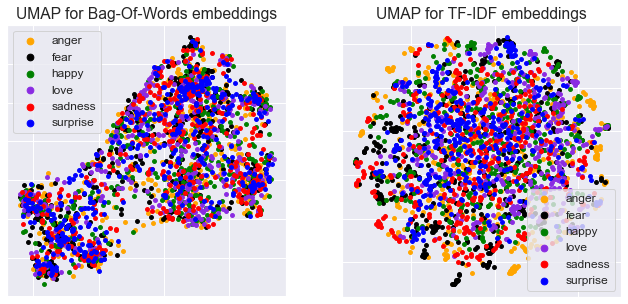

In [9]:
pathes = [
    './embeddings/bag_of_words_embeddings.csv',
    './embeddings/tf_idf_embeddings.csv',
]

titles = [
    'Bag-Of-Words', 'TF-IDF'
]

n_components = [1400, 800]

plt.figure(figsize=(11, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    data = pd.read_csv(pathes[i])
    
    pca = PCA(n_components=n_components[i], random_state=42).fit(data)
    data = pca.transform(data)
    umap_emb = UMAP(random_state=42).fit_transform(data)

    cdict = {0: 'orange', 1: 'black', 2: 'green', 3: 'blueviolet', 4: 'red', 5: 'blue'}


    plt.title('UMAP for {} embeddings'.format(titles[i]))
    for g in np.unique(y):
        ix = np.where(y == g)
        plt.scatter(umap_emb[ix, 0], umap_emb[ix, 1], c = cdict[g], label = label_encoder.inverse_transform([g])[0], s=15)
    legend = plt.legend(prop={'size': 12})
    for i in range(6):
        legend.legendHandles[i]._sizes = [45]
    plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.show()

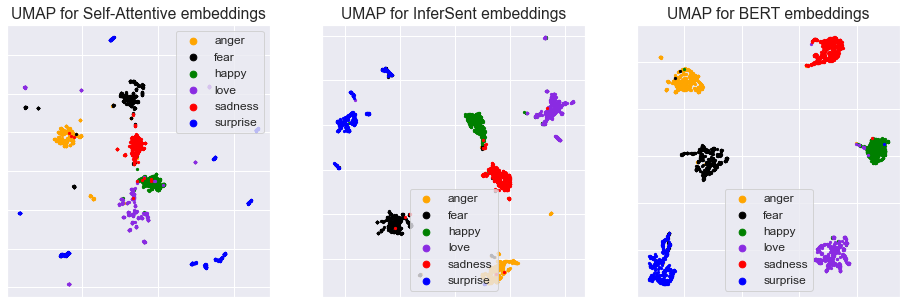

In [10]:
pathes = [
    './embeddings/self_attentive_embeddings.csv',
    './embeddings/infersent_embeddings.csv',
    './embeddings/bert_embeddings.csv'
]

titles = [
    'Self-Attentive', 'InferSent', 'BERT'
]

plt.figure(figsize=(16, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    data = pd.read_csv(pathes[i])
    umap_emb = UMAP(random_state=42).fit_transform(data)

    cdict = {0: 'orange', 1: 'black', 2: 'green', 3: 'blueviolet', 4: 'red', 5: 'blue'}


    plt.title('UMAP for {} embeddings'.format(titles[i]))
    for g in np.unique(y):
        ix = np.where(y == g)
        plt.scatter(umap_emb[ix, 0], umap_emb[ix, 1], c = cdict[g], label = label_encoder.inverse_transform([g])[0], s=5)
    legend = plt.legend(prop={'size': 12})
    for i in range(6):
        legend.legendHandles[i]._sizes = [45]
    plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
plt.show()